<span style="color:blue">    


## 위키피디아에서 자료를 가져온 후 워드클라우드로 그리기

### ▶ 관련 사이트: https://pypi.org/project/Wikipedia-API/
    
### ▶ 필요한 라이브러리 설치
###  -  pip install wikipedia-api

</span>


In [1]:
pip install wikipedia-api

  Created wheel for wikipedia-api: filename=Wikipedia_API-0.5.4-py3-none-any.whl size=13462 sha256=b7cf02ae0040264c5712a46ebe30d3244aa333cd67772c12e227ee2b10bf2b87
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\ed\88\e3\da3d4d73cb91d659488cfa25913b84bbc26febec99d257bce9
Successfully built wikipedia-api



In [1]:
## 기본
import numpy as np                    # numpy 패키지 가져오기
import pandas as pd                   # pandas 패키지 가져오기
import matplotlib.pyplot as plt       # 시각화 패키지 가져오기

## Text 데이터 처리

from konlpy.tag import Okt
from konlpy.tag import Kkma
from konlpy.tag import Komoran
from konlpy.tag import Hannanum


import requests 
from bs4 import BeautifulSoup

import wikipediaapi          # wikipedia api 패키지 가져오기 

from wordcloud  import WordCloud
from wordcloud  import ImageColorGenerator
from collections import Counter

import warnings
warnings.filterwarnings('ignore')


In [2]:
#한국 wikipedia 사이트로 접속하도록 세팅하기 

wiki = wikipediaapi.Wikipedia(
              language='ko', 
              extract_format=wikipediaapi.ExtractFormat.WIKI) 


### ▶ 검색어 지정

#### - 해당 페이지가 있는지 먼저 확인해야 함


In [3]:
# 위키피디아에서 검색 단어 페이지를 가져옴 


p_wiki = wiki.page("BTS") 

print("Page Exists ??? :  ", p_wiki.exists()) #있으면 true
print()

print(p_wiki.text)


Page Exists ??? :   True

방탄소년단은 2013년 6월 13일에 데뷔한 빅히트 뮤직 소속 대한민국 7인조 보이 그룹이다.방탄복이 총알을 막아내는 것처럼, 살아가는 동안 힘든 일을 겪는 10대, 20대가 겪는 힘든 일과 편견을 막아내고 자신들의 음악적 가치를 당당히 지켜내겠다는 의미를 담고 있다  방탄소년단을 지칭하는 'BTS'는 본래 이름인 'Bangtan Boys' 혹은 'Bulletproof Boys'의 준말이다. 2017년 빅히트 뮤직는 방탄소년단의 공식 로고를 교체하면서 과거와 미래를 아우르는 개념으로 의미를 확장시키고, 'Beyond The Scene'의 준말로 의미를 추가했다. 이는 매 순간마다 청춘의 장면들을 뛰어넘는다는 의미를 가지고 있다.2013년 방탄소년단은 《2 COOL 4 SKOOL》을 발매하며 데뷔하였고, 그 해 신인상을 수상했다. 이후 2015년에 《화양연화 pt.1》을 발매해 첫 음악방송 1위를 수상하였고, 2016년에 《WINGS》를 발매해 첫 대상을 수상하였다. 2017년에는 《YOU NEVER WALK ALONE》을 발매해 타이틀 곡 〈봄날〉은 2021년 현재까지 대한민국 주요 음원 차트에 최장기간 진입 중이다. 2018년에는 <LOVE YOURSELF 轉 'Tear'>를 발매해 빌보드 200 1위를 기록하였고, 방탄소년단은 최초로 빌보드 200 1위를 차지한 대한민국의 음악 그룹이 되었다. 이어서 <LOVE YOURSELF 結 'Answer'>를 발매해 빌보드 200 1위를 기록하였다. 2019년에는 <MAP OF THE SOUL : PERSONA>를 발매해 빌보드 200 1위를 기록하였다. 그 해 방탄소년단은 대한민국 음악 시상식의 대상 부문을 모두 휩쓸었으며, 한국대중음악상에서도 올해의 음악인을 2년 연속 수상하면서 음악성과 상업적 성과를 모두 인정받은 음악 그룹이 되었다. 2020년에는 <MAP OF THE SOUL : 7>를 발매해 대한민국 역대 음반 초동 1위라는 기록을 세우며 빌보드 200 1위를

### ▶ 명사만 추출하는 함수 만들기

In [4]:
# 두음절 이상만 추출


okt = Okt()

def tokenizer(text) :
    nouns = okt.nouns(text)    #일반명사, 고유명사... 명사란 명사는 다나옴.(핀셋분석 안할때)
    return [noun for noun in nouns if len(noun) > 1] #길이가 큰 것만 주세요


In [5]:
# 단어의 출현 횟수 카운트


counts = Counter(tokenizer(p_wiki.text))

words = counts.most_common(100)
                 
print(words)


[('방탄소년단', 208), ('차트', 88), ('미국', 76), ('앨범', 74), ('빌보드', 65), ('기록', 58), ('발매', 52), ('뮤직', 42), ('음반', 39), ('그룹', 37), ('음악', 35), ('싱글', 34), ('공식', 32), ('일본', 32), ('대한민국', 29), ('이후', 29), ('어워드', 29), ('가수', 29), ('공개', 29), ('한국', 28), ('최초', 27), ('또한', 27), ('세계', 27), ('차지', 26), ('시상식', 26), ('데뷔', 25), ('화양연화', 23), ('진입', 22), ('부문', 22), ('아미', 22), ('콘서트', 21), ('공연', 20), ('무대', 20), ('발표', 19), ('가장', 17), ('판매', 17), ('활동', 17), ('트위터', 16), ('통해', 16), ('정규', 16), ('빅히트', 15), ('멤버', 15), ('개최', 15), ('아티스트', 15), ('연속', 14), ('시작', 14), ('올해', 13), ('판매량', 13), ('기부', 13), ('주간', 13), ('타이틀곡', 13), ('다시', 13), ('유튜브', 13), ('인기', 13), ('영어', 12), ('엔터테인먼트', 12), ('서울', 12), ('미니', 12), ('올림픽', 12), ('기준', 12), ('오리콘', 12), ('수록', 12), ('지난', 12), ('돌파', 12), ('이름', 11), ('방송', 11), ('리믹스', 11), ('진행', 11), ('단독', 11), ('투어', 11), ('글로벌', 11), ('사랑', 11), ('대한', 11), ('노래', 11), ('선정', 11), ('최고', 11), ('위로', 11), ('회수', 11), ('현재', 10), ('팬클럽', 10), ('대해', 10)

### ▶ 실루엣을 이용한 워드클라우드 그리기

{'방탄소년단': 208, '차트': 88, '미국': 76, '앨범': 74, '빌보드': 65, '기록': 58, '발매': 52, '뮤직': 42, '음반': 39, '그룹': 37, '음악': 35, '싱글': 34, '공식': 32, '일본': 32, '대한민국': 29, '이후': 29, '어워드': 29, '가수': 29, '공개': 29, '한국': 28, '최초': 27, '또한': 27, '세계': 27, '차지': 26, '시상식': 26, '데뷔': 25, '화양연화': 23, '진입': 22, '부문': 22, '아미': 22, '콘서트': 21, '공연': 20, '무대': 20, '발표': 19, '가장': 17, '판매': 17, '활동': 17, '트위터': 16, '통해': 16, '정규': 16, '빅히트': 15, '멤버': 15, '개최': 15, '아티스트': 15, '연속': 14, '시작': 14, '올해': 13, '판매량': 13, '기부': 13, '주간': 13, '타이틀곡': 13, '다시': 13, '유튜브': 13, '인기': 13, '영어': 12, '엔터테인먼트': 12, '서울': 12, '미니': 12, '올림픽': 12, '기준': 12, '오리콘': 12, '수록': 12, '지난': 12, '돌파': 12, '이름': 11, '방송': 11, '리믹스': 11, '진행': 11, '단독': 11, '투어': 11, '글로벌': 11, '사랑': 11, '대한': 11, '노래': 11, '선정': 11, '최고': 11, '위로': 11, '회수': 11, '현재': 10, '팬클럽': 10, '대해': 10, '경기장': 10, '아시아': 10, '관왕': 10, '월드': 10, '아이튠즈': 10, '스페셜': 10, '순위': 10, '한국어': 10, '동안': 9, '청춘': 9, '전세계': 9, '참여': 9, '힙합': 9, '슈가': 9, '동시': 9, '가온차트': 9,

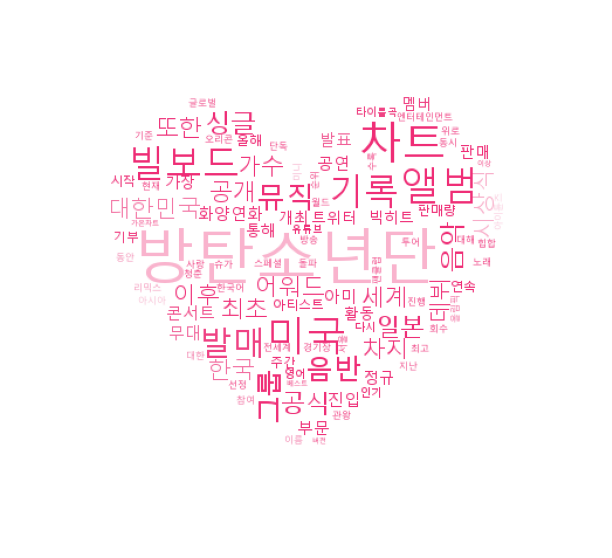

In [6]:
# 최적의 결과를 얻으려면 명암 대비가 높은 이미지를 선택해야 함 
# 이미지 주위 배경이 투명한 경우는 피해야 함  


cloud_img = plt.imread('heart.jpg')

wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                      background_color='white',
#                       random_state = 1,
#                       colormap = 'Accent_r',
                      color_func = ImageColorGenerator(cloud_img),   # img의 color 를 이용
                      mask = cloud_img)      # 읽어드린 그림 이미지에 맞게 그림 

print(dict(words))

cloud = wordcloud.generate_from_frequencies(dict(words))  

fig = plt.figure(figsize=(12, 10))

plt.axis('off')

plt.imshow(cloud)

plt.show()



중간 프로젝트 보고서
목표: 그동안 배운 내용을 기반으로 나만의 텍스트 마이닝 해보기
(수집, 분석하는 과정을 배웠음.)

데이터분석: 전공과 관련된 테마(주제)를 잡기.(교육, 경제...) 논문이 전자파일, 페이지... 우리가 배운 프로그램으로 분석해봄.

5월 10일 자정까지 제출

-> 기말때 추가하거나 신규로 진행해 제출

*데이터를 스크래핑으로 준비하는 경우, 스크래핑 하는 코드도 제출

<과제>: 4/27 까지
-목표: 네이버 뉴스 사이트에서 특정 키워드로 검색하는 프로그램 작성

-필수 구현 요소

특정 검색어, 마지막 페이지 입력받기

입력 페이지 수만큼 기사 헤드라인 검색 및 수집

수집 단어를 출현 빈도에 근거해 키워드의 word cloud그리기

중간기간 다음주 화요일 휴강

## 수고하셨습니다.  😀